In [3]:
# Daniel Schacher, homework #3, phys300


import  numpy  as  np
import  matplotlib.pyplot  as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# integrate by rectangles
def Rectangle(f, start, end, parts, plot=1):
  
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = resultsy[i] * deltax
    
    # plot
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)


# intgrate with simpson rule
def Simpson(f, start, end, parts, plot=1):

    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    area = np.empty([parts+1],float)
    for i in range(parts+1):
        if (i == 0 or i == parts):
            coef = 1/3
        elif (i % 2 == 1):
            coef = 4/3
        else:
            coef = 2/3
        area[i] = coef * resultsy[i] * deltax

    # plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        plt.xlim([start,end])
        plt.ylim([min(y),max(y)])
        plt.show()
        
        print('The sum of the area is ' , sum(area))
    return sum(area)


# integrate by trapezoid rule
def Trapezoid(f, start, end, parts, plot=1):
    
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

    # plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.xlim([start,end])
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)         
        plt.show()
        
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

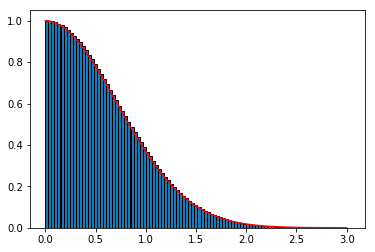

The Sum of the area is:  0.892347069854365


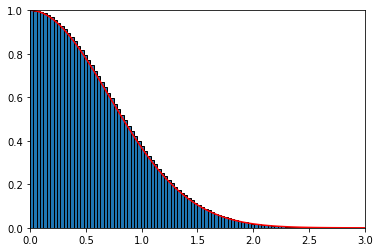

The sum of the area is  0.8862073481597857


TypeError: Object of type 'ndarray' is not JSON serializable

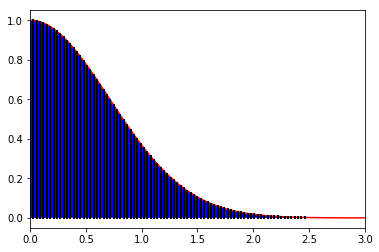

The Sum of the area is:  0.8862072927500886


0.8862072927500886

In [5]:
f = lambda x: np.exp(-x**2) 
Rectangle(f,0,3,100)
Simpson(f, 0, 3, 100)
Trapezoid(f, 0,3,100)
